In [1]:
#If opening in colab run this cell
# !git clone https://github.com/bwolfson2/foster_in_dev
# %cd foster_in_dev/Homeworks

# IF OPENING IN COLAB, PLEASE REMEMBER TO SAVE THE NOTEBOOK TO YOUR GOOGLE DRIVE

To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_in_dev/blob/master/Homeworks/Homework%203.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

# Predicting Churn

After discussing the churn problem at TelCo with Henrietta for a while (remember, from your pre-class assignment?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. 

You've been authorized to give the retention offer to up to 25% of the customers whose contract is expiring. It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. The historical data includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

__1. Load the churn data. The code below will also transform your categorical variables into dummy variables. No points for this. This is just meant to help you get started.__

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

# Just change the path below so that it points to your file.
data_path = "./data/data-hw3.csv" 

df = pd.read_csv(data_path)
df = pd.get_dummies(df, drop_first=True)

In [4]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [5]:
print("The data has %d lines and %d columns."%(df.shape[0],df.shape[1]))

The data has 7032 lines and 30 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   gender_Male                            7032 non-null   uint8  
 4   Partner_Yes                            7032 non-null   uint8  
 5   Dependents_Yes                         7032 non-null   uint8  
 6   PhoneService_Yes                       7032 non-null   uint8  
 7   MultipleLines_No phone service         7032 non-null   uint8  
 8   MultipleLines_Yes                      7032 non-null   uint8  
 9   InternetService_Fiber optic            7032 non-null   uint8  
 10  InternetService_No                     7032 non-null   uint8  
 11  Onli

__2. Split the data into 80% training data and 20% test data.__

In [7]:
target = "Churn_Yes"
predictors = df.columns[df.columns != target]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[predictors], df[target],train_size=0.8,test_size=0.2)

__3. Build the best model you can for each of the following three model types:__
- __A decision tree classifier. Try different values for the parameter min_samples_leaf.__
- __A logistic regression. Try different values for the parameter C.__
- __A third model of your choice. Some suggestions: KNN, SVM, etc. Try different paramater values for this one too.__

__Optimize in terms of their generalization performance using ROC Area and cross-validation with 10 folds. Remember to use only the training data (do not use the test data at all for this example). For each of these model types, you should report the best parameter value you found and the corresponding ROC Area in the cross-validation. Your code should also show the process you went through to try different complexity parameter(s) for each model type. Pick one model to move forward with. Why did you select this one?__

__HINT: There is an example below of the ROC Area for a DecisionTreeClassifier using cross validation.__  

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import time

def DecisionTree(X_train, y_train, min_samples_leaf):
    start_time = time.time()
    dt = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf)
    # Remember to only use the training data here!!
    avg_auc = cross_val_score(dt, X_train, y_train, cv=10, scoring="roc_auc").mean()
    end_time = time.time()
    print("min_samples_leaf:", min_samples_leaf, "avg_auc:", avg_auc, "training time used:", (end_time - start_time))
    return min_samples_leaf, avg_auc, (end_time - start_time)

dt_para = []
dt_auc = []
dt_train_time = []

for i in range(1,200, 5):
    dt_para_i, dt_auc_i, dt_train_time_i = DecisionTree(X_train, y_train, i)
    dt_para.append(dt_para_i)
    dt_auc.append(dt_auc_i)
    dt_train_time.append(dt_train_time_i)

min_samples_leaf: 1 avg_auc: 0.6559740410919037 training time used: 0.2720625400543213
min_samples_leaf: 6 avg_auc: 0.7606968689485714 training time used: 0.19593429565429688
min_samples_leaf: 11 avg_auc: 0.7909356010017351 training time used: 0.20506763458251953
min_samples_leaf: 16 avg_auc: 0.8054480888693828 training time used: 0.16860151290893555
min_samples_leaf: 21 avg_auc: 0.8099768836411056 training time used: 0.18764781951904297
min_samples_leaf: 26 avg_auc: 0.8178446197638184 training time used: 0.19862079620361328
min_samples_leaf: 31 avg_auc: 0.8183181020203023 training time used: 0.23598289489746094
min_samples_leaf: 36 avg_auc: 0.8211226220982638 training time used: 0.16416645050048828
min_samples_leaf: 41 avg_auc: 0.8227756344610719 training time used: 0.17897772789001465
min_samples_leaf: 46 avg_auc: 0.8235766292746387 training time used: 0.15523862838745117
min_samples_leaf: 51 avg_auc: 0.8241627005475879 training time used: 0.1720445156097412
min_samples_leaf: 56 avg_

In [10]:
print("The best roc_auc under min_samples_leaf space:", max(dt_auc), "\nmin_samples_leaf:", dt_para[dt_auc.index(max(dt_auc))], "\ntraining time used:", dt_train_time[dt_auc.index(max(dt_auc))])

The best roc_auc under min_samples_leaf space: 0.8270451744305856 
min_samples_leaf: 86 
training time used: 0.14389324188232422


In [11]:
dt_best = dt_para[dt_auc.index(max(dt_auc))]

In [12]:
from sklearn.linear_model import LogisticRegression

def Logistic(X_train, y_train, C):
    start_time = time.time()
    lr = LogisticRegression(C = C)
    # Remember to only use the training data here!!
    avg_auc = cross_val_score(lr, X_train, y_train, cv=10, scoring="roc_auc").mean()
    end_time = time.time()
    print("C:", C, "avg_auc:", avg_auc, "training time used:", (end_time - start_time))
    return C, avg_auc, (end_time - start_time)

lr_para = []
lr_auc = []
lr_train_time = []

for i in range(1,101, 1):
    lr_para_i, lr_auc_i, lr_train_time_i = Logistic(X_train, y_train, i/100)
    lr_para.append(lr_para_i)
    lr_auc.append(lr_auc_i)
    lr_train_time.append(lr_train_time_i)

C: 0.01 avg_auc: 0.8353345343772268 training time used: 0.8589968681335449
C: 0.02 avg_auc: 0.8380812399618058 training time used: 0.8545193672180176
C: 0.03 avg_auc: 0.838901064500855 training time used: 0.7040011882781982
C: 0.04 avg_auc: 0.8395885343174498 training time used: 0.837003231048584
C: 0.05 avg_auc: 0.8396570142693769 training time used: 0.8229963779449463
C: 0.06 avg_auc: 0.8398704020940795 training time used: 0.6439998149871826
C: 0.07 avg_auc: 0.8399650265771272 training time used: 0.6849985122680664
C: 0.08 avg_auc: 0.839991072790968 training time used: 0.6339988708496094
C: 0.09 avg_auc: 0.8399795264095946 training time used: 0.6420018672943115
C: 0.1 avg_auc: 0.8401883798413395 training time used: 0.6770005226135254
C: 0.11 avg_auc: 0.8403056055007339 training time used: 0.6759984493255615
C: 0.12 avg_auc: 0.840220816678386 training time used: 0.6955125331878662
C: 0.13 avg_auc: 0.8402583896101445 training time used: 0.6909983158111572
C: 0.14 avg_auc: 0.84027964973

In [13]:
print("The best roc_auc under C space:", max(lr_auc), "\nC:", lr_para[lr_auc.index(max(lr_auc))], "\ntraining time used:", lr_train_time[lr_auc.index(max(lr_auc))])

The best roc_auc under C space: 0.8405759701555929 
C: 0.62 
training time used: 0.7530336380004883


In [14]:
lr_best = lr_para[lr_auc.index(max(lr_auc))]

In [15]:
from sklearn.svm import SVC

def SVM(X_train, y_train, C):
    start_time = time.time()
    svc = SVC(C = C)
    # Remember to only use the training data here!!
    avg_auc = cross_val_score(svc, X_train, y_train, cv=10, scoring="roc_auc").mean()
    end_time = time.time()
    print("C:", C, "avg_auc:", avg_auc, "training time used:", (end_time - start_time))
    return C, avg_auc, (end_time - start_time)

svc_para = []
svc_auc = []
svc_train_time = []

for i in range(1,101, 5):
    svc_para_i, svc_auc_i, svc_train_time_i = SVM(X_train, y_train, i/100)
    svc_para.append(svc_para_i)
    svc_auc.append(svc_auc_i)
    svc_train_time.append(svc_train_time_i)

C: 0.01 avg_auc: 0.7909950770571514 training time used: 8.224233388900757
C: 0.06 avg_auc: 0.790716147000851 training time used: 8.934046745300293
C: 0.11 avg_auc: 0.7849115065825386 training time used: 9.192878723144531
C: 0.16 avg_auc: 0.7825895119844832 training time used: 8.825699806213379
C: 0.21 avg_auc: 0.7812619573476043 training time used: 8.325140237808228
C: 0.26 avg_auc: 0.7795594559986911 training time used: 8.874243021011353
C: 0.31 avg_auc: 0.7774264232802734 training time used: 7.803860187530518
C: 0.36 avg_auc: 0.7754339370800869 training time used: 7.84240198135376
C: 0.41 avg_auc: 0.7744473074436407 training time used: 7.703392267227173
C: 0.46 avg_auc: 0.7740786255086937 training time used: 7.750656843185425
C: 0.51 avg_auc: 0.774379739876073 training time used: 8.47593903541565
C: 0.56 avg_auc: 0.7748128156967863 training time used: 8.28244161605835
C: 0.61 avg_auc: 0.7754597866593678 training time used: 8.038134098052979
C: 0.66 avg_auc: 0.7763624376078542 trainin

In [16]:
print("The best roc_auc under C space:", max(svc_auc), "\nC:", svc_para[svc_auc.index(max(svc_auc))], "\ntraining time used:", svc_train_time[svc_auc.index(max(svc_auc))])

The best roc_auc under C space: 0.7909950770571514 
C: 0.01 
training time used: 8.224233388900757


In [17]:
svc_best = svc_para[svc_auc.index(max(svc_auc))]

**Model selection**

As shown in the table below, Logistic Regression has the most roc_auc score, and Decision Tree requires the least training time. As our problem doesn't have a rigorous request on time, added both LR and DT spending time are not too much. I will choose Logistic Regression here.

| Model                    | Best roc_auc       | Training Time       |
|--------------------------|--------------------|---------------------|
| Decision Tree Classifier | 0.83 | 0.14 |
| Logistic Regression      | 0.84 | 0.75 |
| SVM                      | 0.79 | 8.22 |

__4. Use your test data to plot the ROC Curves for each of the three best models you found in the previous question (make sure to plot the three curves together). Would you consider changing the selected model after looking at the curves? If yes, explain why. If not, explain what would the curves need to look like for you to consider changing the selected model.__

__HINT: There is an example below of the ROC curve for the DecisionTreeClassifier that was used earlier__

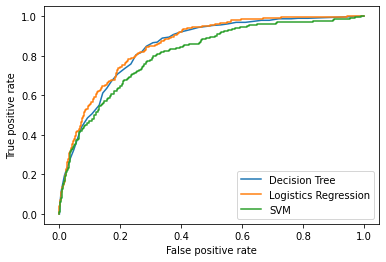

In [18]:
# The code below is just meant as an example for you to plot the ROC curve.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Remember to use the training data here!! 
dt_opt = DecisionTreeClassifier(min_samples_leaf = dt_best)
dt_opt.fit(X_train, y_train)

lr_opt = LogisticRegression(C = lr_best)
lr_opt.fit(X_train, y_train)

svc_opt = SVC(C = svc_best, probability=True)
svc_opt.fit(X_train, y_train)

# And to use the test data here!!
dt_probs = dt_opt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probs)

lr_probs = lr_opt.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs)

svc_probs = svc_opt.predict_proba(X_test)[:, 1]
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc_probs)

plt.plot(dt_fpr, dt_tpr, label="Decision Tree")
plt.plot(lr_fpr, lr_tpr, label="Logistics Regression")
plt.plot(svc_fpr, svc_tpr, label="SVM")

plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

I will not change the model.

As we can see from the figure above, the orange line (Logistics Regression) has the most AUC and above others almost all the time.

If I'm going to change the model, maybe the Logistics Regression was the green line or even below the green line. That's obviously overfitting (perform best in the training set while terrible in the test set).

__5. What would be the potential benefit of stopping someone from leaving? HINT: Take a look at the description of the data and the retention offer.__

In [19]:
print((pd.DataFrame(lr_probs)[pd.DataFrame(lr_probs)[0]>0.5].count()[0] / len(lr_probs)*100), "% of customers will leave with 0.5 as the threshold")

22.24591329068941 % of customers will leave with 0.5 as the threshold


In [20]:
pd.DataFrame({"Feature":X_test.columns, "Weights":lr_opt.coef_[0]})

,Feature,Weights
0,SeniorCitizen,0.180652
1,tenure,-0.035202
2,MonthlyCharges,0.005835
3,gender_Male,-0.038129
4,Partner_Yes,-0.010864
5,Dependents_Yes,-0.131019
6,PhoneService_Yes,-0.524561
7,MultipleLines_No phone service,0.137775
8,MultipleLines_Yes,0.249914
9,InternetService_Fiber optic,0.735988


If we use the model selected and choose 0.5 as the threshold, we can see only 22% of customers have the tendency to leave shortly after contract expiration. We have the retention offer to up 25% of customers whose contract is expiring. If we rank the probability and choose the right people to offer, we can prevent the most customers from churn and add user stickiness. From the coeff between features and churn, we can see two year contract customers are less likely to leave. After the potential leaving customers get used to TelCo's services, they are highly likely to order a subscribe themselves afterward.

__6. Split your training data into two sets, one with 90% of the data (the "sub-training" set) and another with 10% of the data (the validation set). Train the model you selected with the "sub-training" set, apply it to the validation set, and plot a profit curve by ranking customers according to their probability of churning. Make a recommendation of what people to target with the retention incentive according to this profit curve.__

In [21]:
X_train_sub,X_val,y_train_sub,y_val = train_test_split(X_train, y_train,train_size=0.9,test_size=0.1)

In [22]:
lr_opt_sub = LogisticRegression(C = lr_best)
lr_opt_sub.fit(X_train_sub, y_train_sub)

LogisticRegression(C=0.62)

In [23]:
lr_val_probs = lr_opt_sub.predict_proba(X_val)[:, 1]

In [24]:
val_result = pd.DataFrame({"y_val":y_val, "y_val_pred":lr_val_probs}).reset_index(drop = True)

In [25]:
val_result

,y_val,y_val_pred
0,0,0.579654
1,1,0.398469
2,0,0.239039
3,0,0.150909
4,0,0.078767
...,...,...
558,0,0.533421
559,0,0.087970
560,0,0.589713
561,0,0.514308


In [26]:
val_result_sorted = val_result.sort_values(by="y_val_pred",ascending=True).reset_index(drop = True)

In [27]:
val_result_sorted

,y_val,y_val_pred
0,0,0.003864
1,0,0.004687
2,0,0.004810
3,0,0.004812
4,0,0.004999
...,...,...
558,1,0.790256
559,1,0.808598
560,1,0.813253
561,1,0.841020


In [28]:
import math

In [29]:
threashold_1 = val_result_sorted["y_val_pred"][math.ceil(len(val_result_sorted["y_val_pred"])*0.75)]

In [30]:
print("The threshold:", val_result_sorted["y_val_pred"][math.ceil(len(val_result_sorted["y_val_pred"])*0.75)])

The threshold: 0.46302247164083193


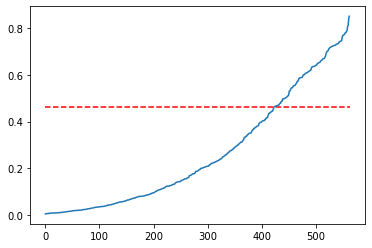

In [31]:
plt.hlines(threashold_1, 0, len(val_result_sorted["y_val_pred"]), colors = "r", linestyles = "dashed")
plt.plot(val_result_sorted["y_val_pred"])

According to the validation set, the top 25% of customers who probably churn's probability is threashold_1. We can target whose probability over that threshold as retention target.

In [32]:
(len(val_result_sorted) - math.ceil(len(val_result_sorted["y_val_pred"])*0.75))/len(val_result_sorted)

0.24866785079928952

In [33]:
sum(val_result_sorted["y_val"])/len(val_result_sorted)

0.2522202486678508

In [34]:
val_result["money"] = val_result.y_val_pred.apply(lambda x: 200 if x > threashold_1 else 0)

In [35]:
val_result

,y_val,y_val_pred,money
0,0,0.579654,200
1,1,0.398469,0
2,0,0.239039,0
3,0,0.150909,0
4,0,0.078767,0
...,...,...,...
558,0,0.533421,200
559,0,0.087970,0
560,0,0.589713,200
561,0,0.514308,200


In [36]:
print("We use:",sum(val_result["money"]))

We use: 27800


In [37]:
val_result["val_pred_churn"] = val_result.y_val_pred.apply(lambda x: 1 if x > threashold_1 else 0)

In [38]:
val_result

,y_val,y_val_pred,money,val_pred_churn
0,0,0.579654,200,1
1,1,0.398469,0,0
2,0,0.239039,0,0
3,0,0.150909,0,0
4,0,0.078767,0,0
...,...,...,...,...
558,0,0.533421,200,1
559,0,0.087970,0,0
560,0,0.589713,200,1
561,0,0.514308,200,1


In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

def evl_model(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(CM, annot=True)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    
    print("roc_auc_score:", roc_auc_score(y_true, y_pred))
    print("accuracy_score:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

roc_auc_score: 0.7304539828041886
accuracy_score: 0.7992895204262878
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       421
           1       0.60      0.59      0.60       142

    accuracy                           0.80       563
   macro avg       0.73      0.73      0.73       563
weighted avg       0.80      0.80      0.80       563



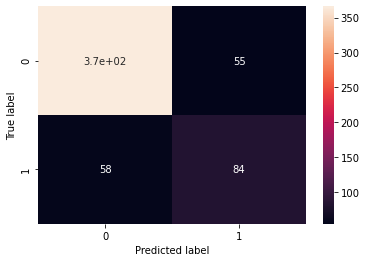

In [40]:
evl_model(val_result["y_val"], val_result["val_pred_churn"])

We use 27800 (the max number) but rightly spend that on 84 customers (Only about 60% predicted churning customers who will actually leave).

In [41]:
def cal_profit(y_true, y_pred):
    
    profit = []

    for i in range(len(y_true)):
    
        # predict not churn right
        if (y_true[i] == 0) & (y_pred[i] == 0):
            profit.append(200)
        
        # predict wrong
        if (y_true[i] == 0) & (y_pred[i] == 1):
            profit.append(-200) # should not give but give retention

        if (y_true[i] == 1) & (y_pred[i] == 0):
            profit.append(0) # should give but not
        
        # predit churn right
        if (y_true[i] == 1) & (y_pred[i] == 1):
            profit.append(0)
            
    return profit

In [42]:
profit = cal_profit(val_result["y_val"], val_result["val_pred_churn"])

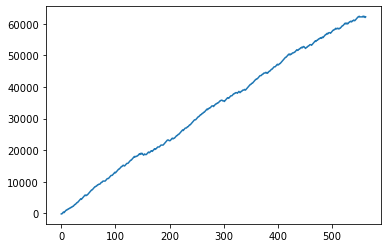

In [43]:
plt.plot(np.cumsum(profit))

__7. Can you think of something better than ranking according to the probability of churning? If so, tell us what it is and plot a profit curve according to this new ranking. Compare the results of the new ranking with the results you got in the previous question. Are the results any better? Would your recommendation change?__

We have the actual churn in the val set. We may start with the right churn prediction. We can choose the mean probability of highest 25% people who really would leave (y_val = 1, choose last 25% sorting ascending by probability). 

In [44]:
val_result_sorted_2 = val_result[(val_result["y_val"] == 1)].sort_values(by="y_val_pred",ascending=True).reset_index(drop = True)

In [45]:
threashold_2 = np.mean(val_result_sorted_2["y_val_pred"][-math.ceil(len(val_result)*0.25):])

In [46]:
val_result["val_pred_churn_2"] = val_result.y_val_pred.apply(lambda x: 1 if x > threashold_2 else 0)

roc_auc_score: 0.7271001304740558
accuracy_score: 0.8117229129662522
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       421
           1       0.65      0.56      0.60       142

    accuracy                           0.81       563
   macro avg       0.75      0.73      0.74       563
weighted avg       0.80      0.81      0.81       563



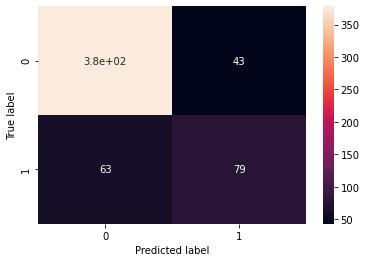

In [47]:
evl_model(val_result["y_val"], val_result["val_pred_churn_2"])

In [48]:
profit_2 = cal_profit(val_result["y_val"], val_result["val_pred_churn_2"])

In [49]:
sum(profit)

62200

In [50]:
sum(profit_2)

67000

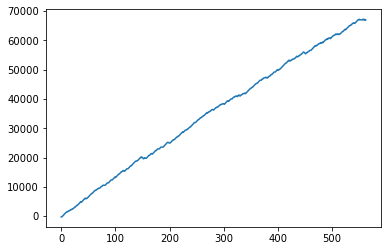

In [51]:
plt.plot(np.cumsum(profit_2))

__8. Now the you have chosen a model and a threshold, it is time to evaluate the potential impact of your solution. Use the entire training data to train the model you selected, and then use the model on the test data to decide which customers to target with a retention offer. How much money do you estimate that your recommendation would have saved if we had given the retention offer to the customers in the test data?__

In [52]:
test_result = pd.DataFrame({"y_test":y_test, "lr_probs":lr_probs}).reset_index(drop = True)

In [53]:
test_result

,y_test,lr_probs
0,0,0.452067
1,0,0.598483
2,0,0.166381
3,0,0.156854
4,0,0.083819
...,...,...
1402,0,0.220679
1403,0,0.011388
1404,0,0.011801
1405,0,0.484502


In [54]:
test_result["pred_churn"] = test_result.lr_probs.apply(lambda x: 1 if x > threashold_1 else 0)

roc_auc_score: 0.73211372669835
accuracy_score: 0.8031272210376688
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1018
           1       0.67      0.57      0.62       389

    accuracy                           0.80      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



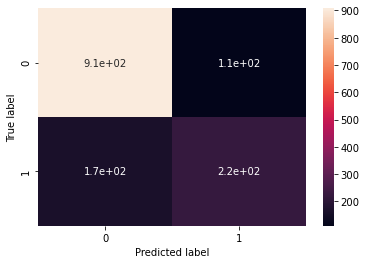

In [55]:
evl_model(test_result["y_test"], test_result["pred_churn"])

In [56]:
profit_3 = cal_profit(test_result["y_test"], test_result["pred_churn"])

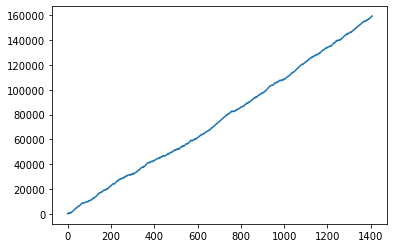

In [57]:
plt.plot(np.cumsum(profit_3))

In [58]:
sum(profit_3)

159200

In [59]:
print("The length of test set:", len(y_test), "The retention offer:", sum(test_result["pred_churn"]), "book money saved:", 200*len(y_test) - 200*sum(test_result["pred_churn"]))

The length of test set: 1407 The retention offer: 334 book money saved: 214600


In [60]:
test_result["pred_churn_2"] = test_result.lr_probs.apply(lambda x: 1 if x > threashold_2 else 0)

roc_auc_score: 0.7272337008398948
accuracy_score: 0.8052594171997157
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1018
           1       0.68      0.55      0.61       389

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



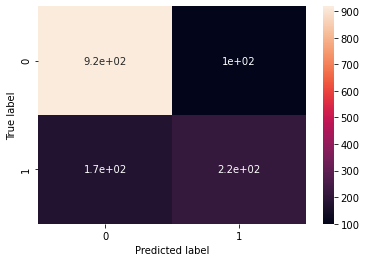

In [61]:
evl_model(test_result["y_test"], test_result["pred_churn_2"])

In [62]:
profit_4 = cal_profit(test_result["y_test"], test_result["pred_churn_2"])

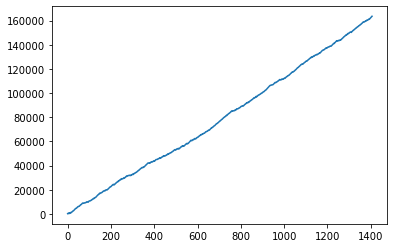

In [63]:
plt.plot(np.cumsum(profit_4))

In [66]:
sum(profit_4)

163600

In [65]:
print("The length of test set:", len(y_test), "The retention offer:", sum(test_result["pred_churn_2"]), "book money saved:", 200*len(y_test) - 200*sum(test_result["pred_churn_2"]))

The length of test set: 1407 The retention offer: 315 book money saved: 218400


As we can see from the test set, we target the same number of churning customers while saving more money use my threashold_2 rather than ranking probability. The money saved directly is 218400. The money saved efficiently would be 163600 (we know who should be given retention but not can't be calculated as a money-saving and who should not be given retention but given are a loss.)